# Scenario
Imagine you are a musician and you need to buy a page turner which able you to turn the pages with eye movement.

## Page Turner specification
1. Have minimum inference time and be realtime
2. Track gaze movement
3. Lowest memory usage

## Some Idea

### Find faces and eyes

#### Face Detector

##### Haar cascade

able to:


  * find face top-left(bounding box)
  * some Facial components landmark 
  * Low inference time
  * Can run on CPU


[please See Weight Repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)

Problems:


*   Occlusion/ self occlusion
*   Low illumination
*   Hard Shadow/ Soft Shadow
*   Less Stable keypoint


Code example:


```python
import cv2

src = cv2.VideoSource("your Ip Cam address, video or webcam")

detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

while src.isOpened:
  ret, frame = src.read()

  if not ret:
    break
  
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  faceRects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)

  # Use face Rect keypoint for your process

  if cv2.waitKey(1) == ord("q"):
    break
  

  cv2.imshow("Test", frame)

src.release()

```





##### MTCNN (Multitask Cascaded Convolutional Networks)

able to:

  * give five point: face top-left, two points for eyes,a point for nose, and to points for lips
  * more robust than Haar Cascade
  * better accuracy than Haar Cascade

problems:
  * hight inference time and low fps on cpu
  * need gpu to gain hight fps

[Article link](https://ieeexplore.ieee.org/document/7553523)

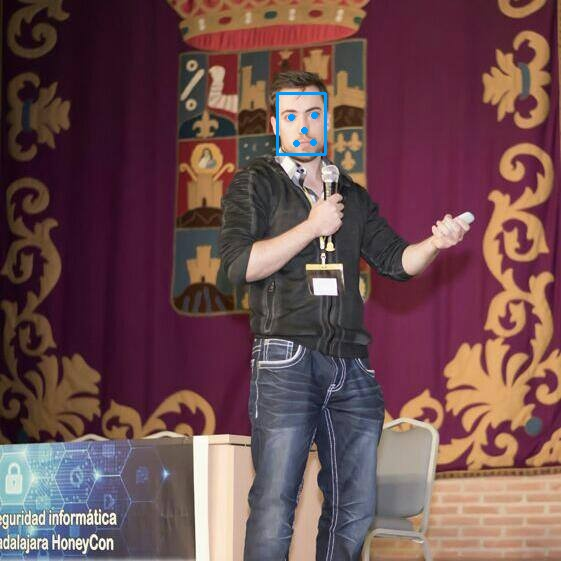

##### RetinaFace

able to: 
* more robust that MTCNN
* has lowest inference time that MTCNN(experienced)
* has the same keypoints like MTCNN
* so tiny faces in proportion to the frame size 
* detect more faces in varian gesture
* higher performance on various light condition

problems:

* need gpu for better inference time

[Please see this repository](https://github.com/deepinsight/insightface/tree/master/detection/retinaface)


##### Other deep based network for face localization


1.   YOLO and other yolo extended
2.   RCNN
3.   Fast RCNN
4. Faster RCNN
5. SSD



#### Facial landmark
With this you can able to get some use full keypoint around facial compunt<br>
like this:


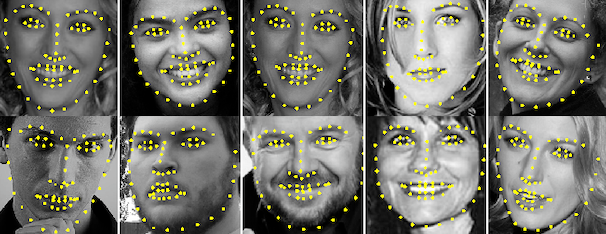

#### Normalization and Alignment

Extracted faces should align after extraction operation to reduce the variant.

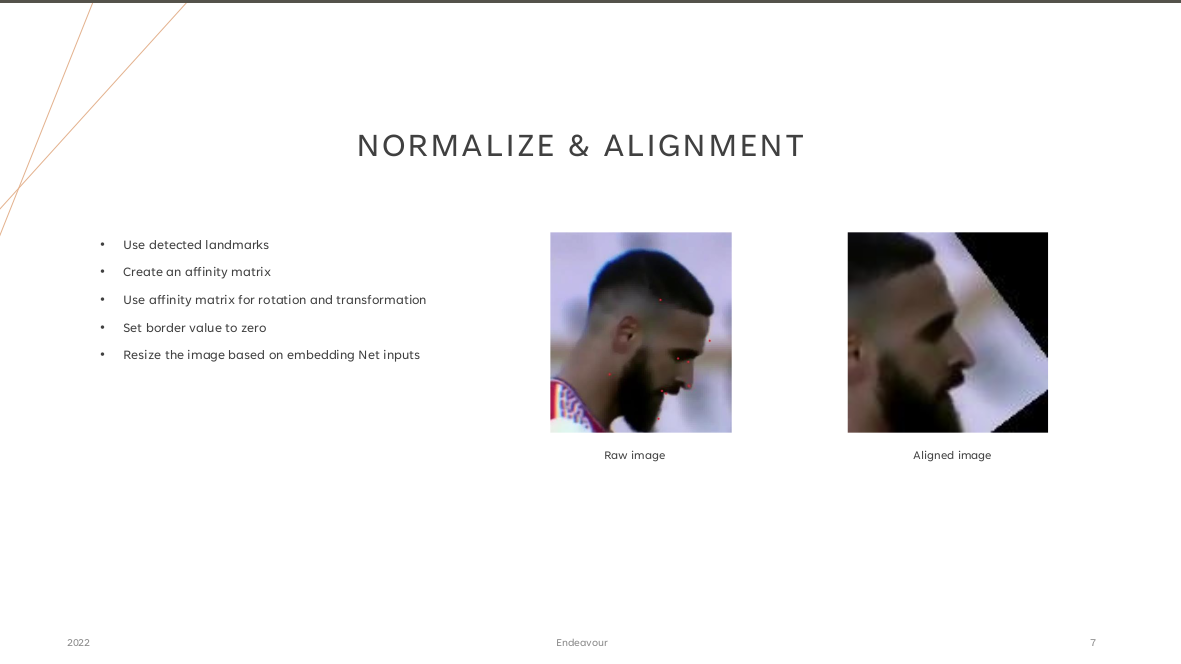

### Circle Hough Transform

Find circle shapes and their centre and radius

```python
import numpy as np
import cv2 as cv
img = cv.imread('opencv-logo-white.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()
```

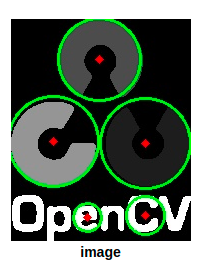

### Tracking

Finding the trajectory of an object over time.

Usage:


*   Reduce inference time and increase FPS
*   Distinguish between objects



